<a href="https://colab.research.google.com/github/KabitaPaudel675/Kabita_AI_Assignments/blob/main/KP_AI_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [ ]:
import pandas as pd #pandas for dataframes
from sklearn.linear_model import LinearRegression #sklearn.linear_model for the Linear Regression model 
import sklearn.metrics as metrics #to measure model performance
import matplotlib.pyplot as plt #for plotting
from sklearn.cluster import KMeans #for kmeans algorithm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
plt.rcParams['figure.figsize'] = [15,8] #defining plot size

# About the dataset
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. The refrence for the dataset is: [Cortez et al., 2009]. This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [ ]:
# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/KabitaPaudel675/AI_Assignment-1/main/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <a list of 10 Patch objects>)

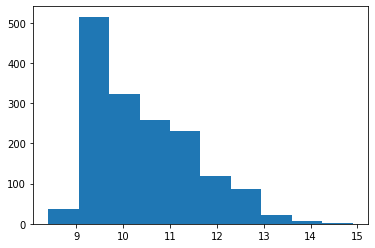

In [ ]:
plt.hist(df['alcohol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


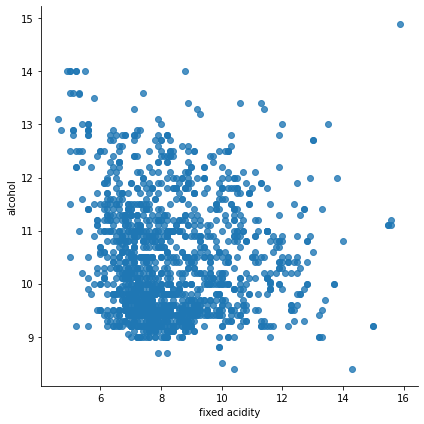

In [ ]:
%matplotlib inline
sns.lmplot('fixed acidity', 'alcohol', df, fit_reg=False, size = 6)

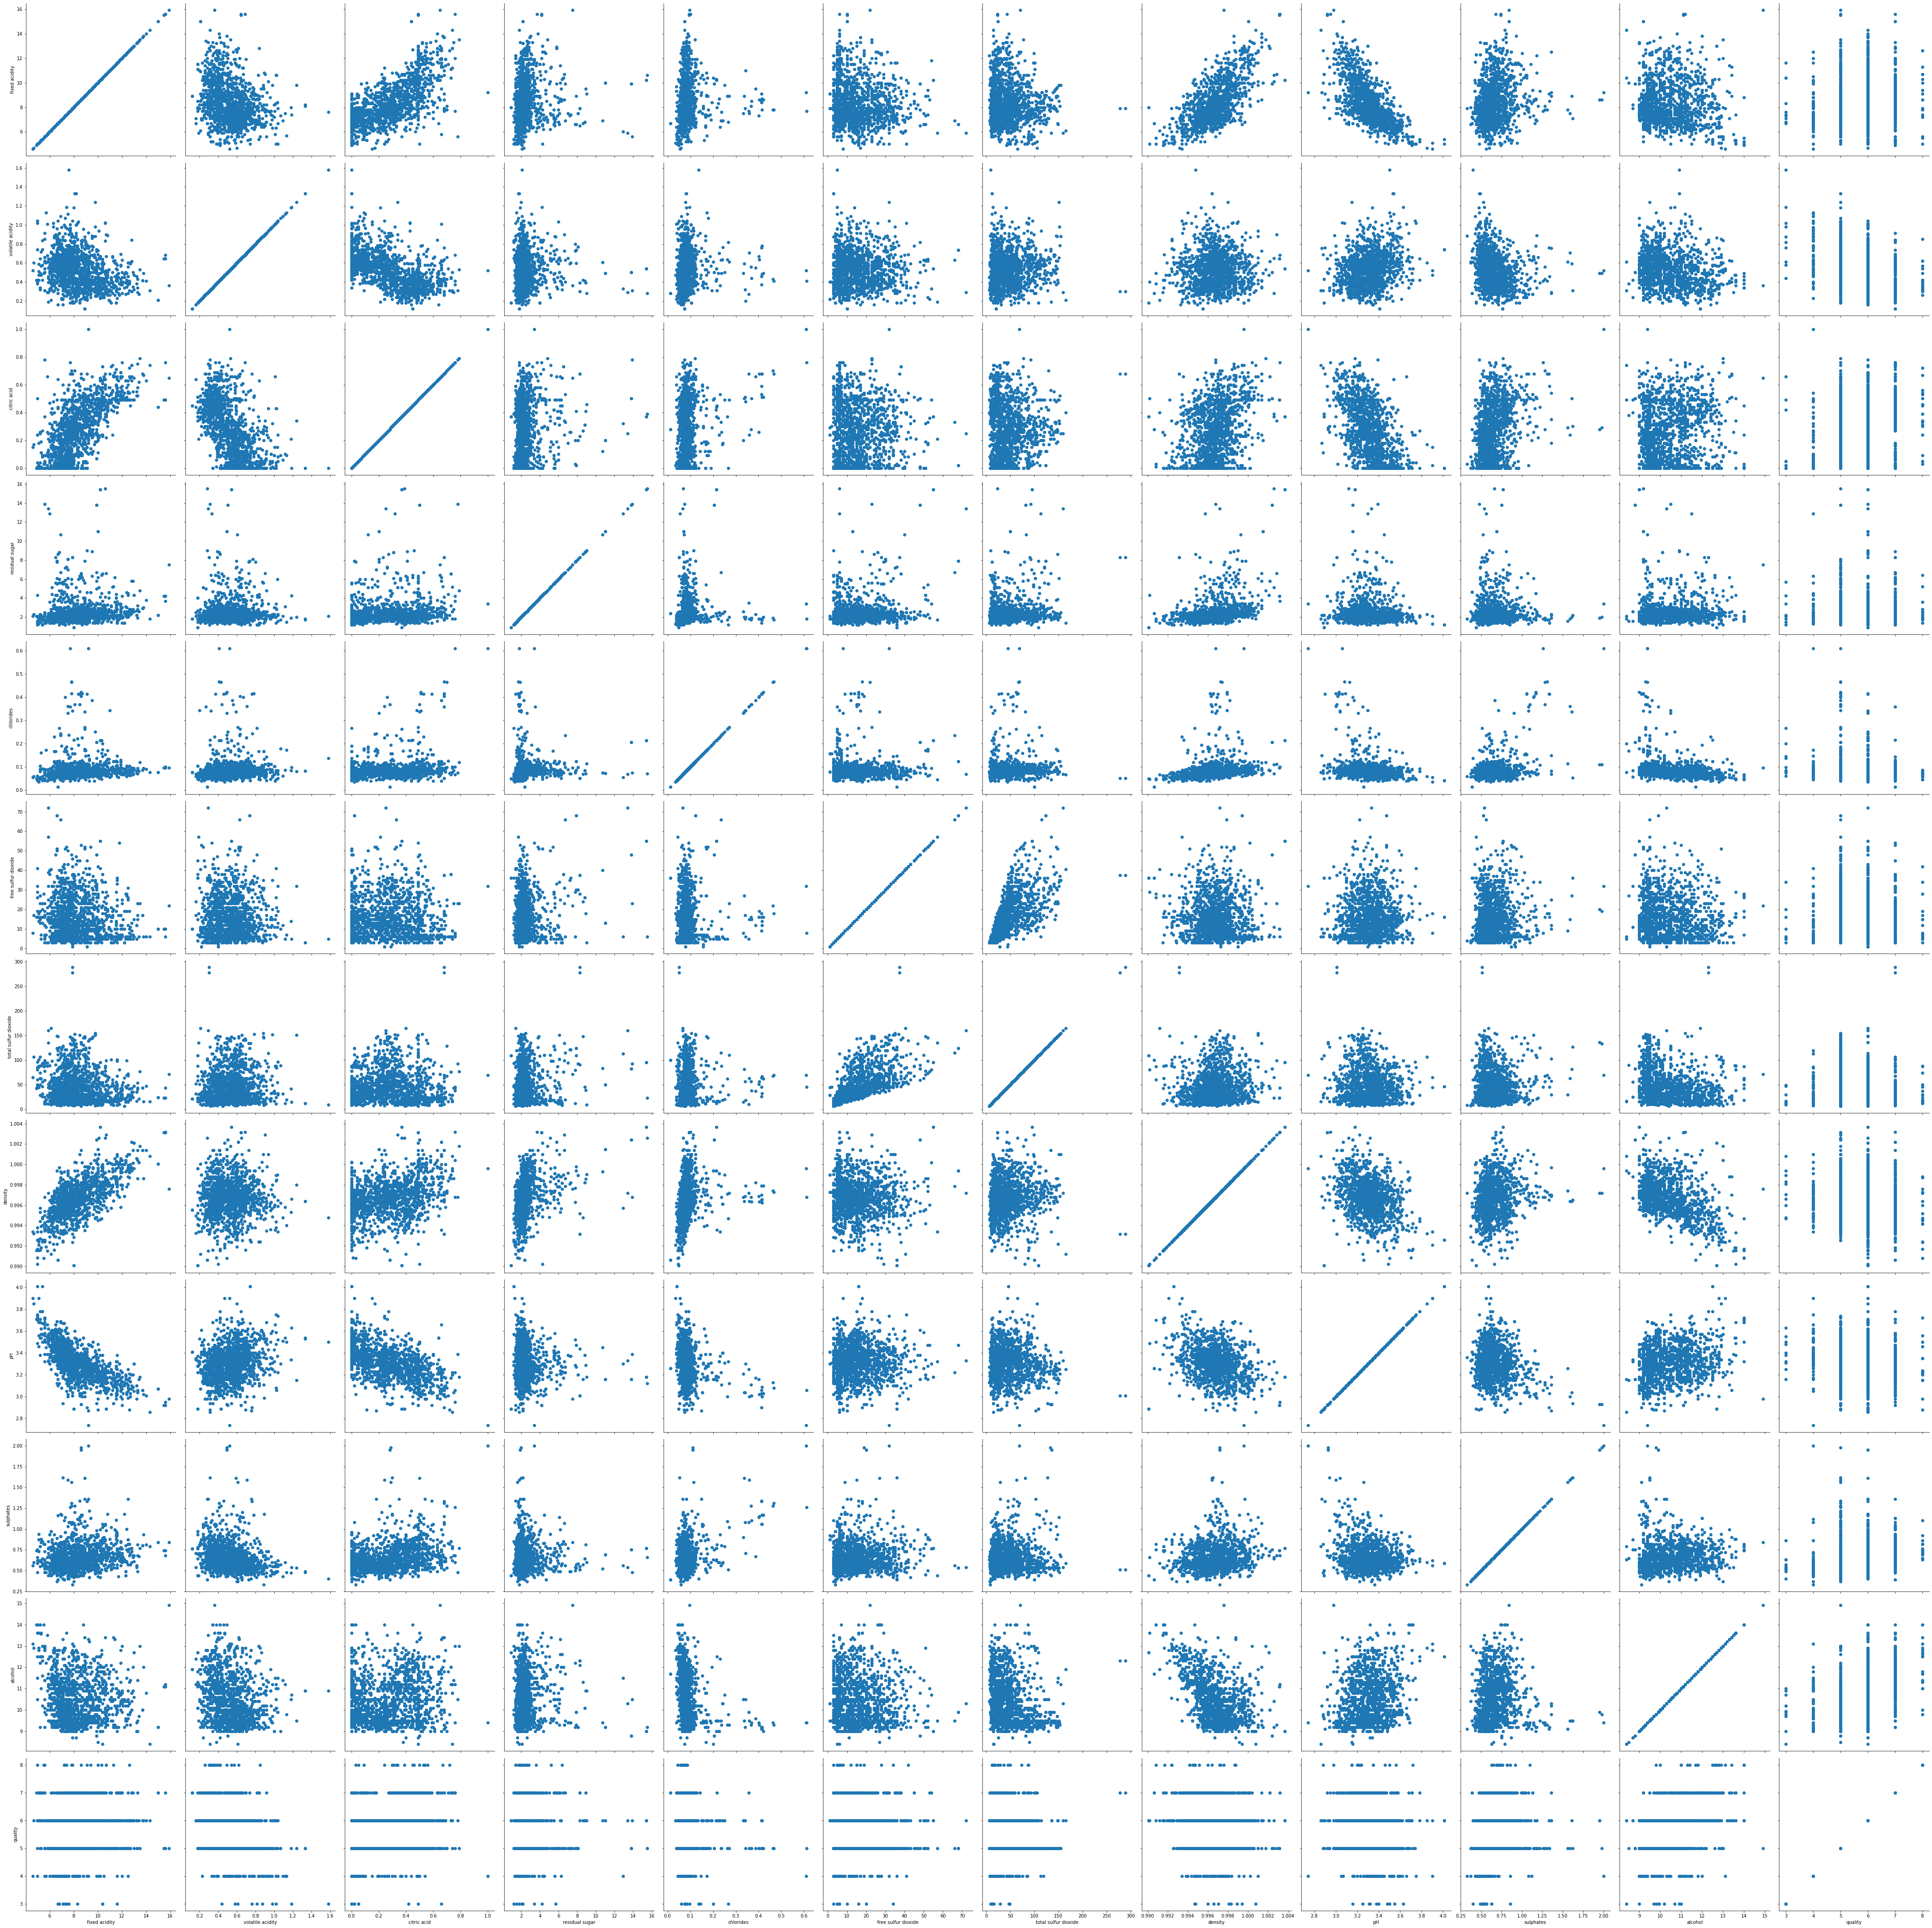

In [ ]:
%matplotlib notebook
%matplotlib inline
g = sns.PairGrid(df, height = 5)
g  = g.map(plt.scatter)

# Setting the labels of the axis in each grid
x_labels, y_labels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    x_labels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    y_labels.append(ylabel)

for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        g.axes[j,i].xaxis.set_label_text(x_labels[i])
        g.axes[j,i].yaxis.set_label_text(y_labels[j])

# Areas of interest: 
 fixed acidity  , residual sugar, chlorides, pH,  alcohol

Scaling of continuous features will be done in order to give each feature equal weight. For this, we will employ scikit-MinMaxScalar

In [ ]:
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)


For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.


K means clustering is an unsupervised learning algorithm used to group the unlabelled data set into different clusters/subsets. K defines the number of clusters to be created in the process of clustering. K-means clustering uses centroid-based algorithm that means each cluster is associated with a centroid.

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

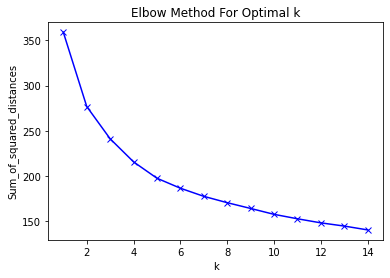

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
df_numeric = df[['fixed acidity', 'residual sugar', 'chlorides', 'pH','alcohol']] ##Selecting fields to segment the data
df_numeric.head()

,fixed acidity,residual sugar,chlorides,pH,alcohol
0,7.4,1.9,0.076,3.51,9.4
1,7.8,2.6,0.098,3.20,9.8
2,7.8,2.3,0.092,3.26,9.8
3,11.2,1.9,0.075,3.16,9.8
4,7.4,1.9,0.076,3.51,9.4


The elbow is approximately at k=5, indicating the clusters fit the dataset at k=5

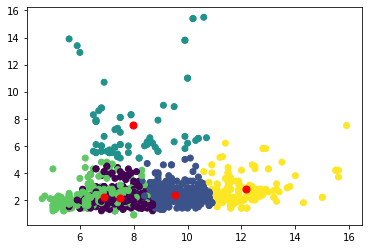

--------------
Cluster: 1: [7.49829721 2.12786378 0.09293189 3.33733746 9.70314757]
Cluster: 2: [ 9.54303797  2.40253165  0.09076962  3.23865823 10.47316456]
Cluster: 3: [ 7.972       7.50666667  0.09213333  3.3004     10.40088889]
Cluster: 4: [ 6.90943953  2.25929204  0.07217404  3.42837758 11.68785644]
Cluster: 5: [12.14930556  2.82673611  0.08745833  3.12173611 10.54837963]


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['fixed acidity'], df_numeric['residual sugar'],c= kmeans.labels_.astype(float)) ##Using fixed acidity and residual sugar for the cluster plotting in scatter plots.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

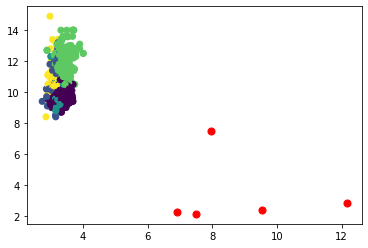

--------------
Cluster: 1: [7.49829721 2.12786378 0.09293189 3.33733746 9.70314757]
Cluster: 2: [ 9.54303797  2.40253165  0.09076962  3.23865823 10.47316456]
Cluster: 3: [ 7.972       7.50666667  0.09213333  3.3004     10.40088889]
Cluster: 4: [ 6.90943953  2.25929204  0.07217404  3.42837758 11.68785644]
Cluster: 5: [12.14930556  2.82673611  0.08745833  3.12173611 10.54837963]


In [ ]:
plt.scatter(df_numeric['pH'], df_numeric['alcohol'],c= kmeans.labels_.astype(float)) ##Using pH and and alcohol for the cluster plotting in scatter plots.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1

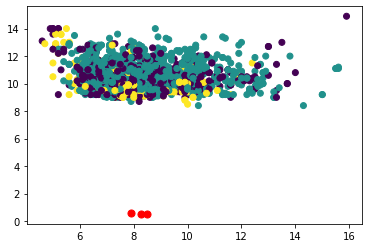

--------------
Cluster: 1: [ 8.25818882  0.52100193  0.2688632   2.48805395  0.09184586 21.93930636
 55.69749518  0.99685516  3.32242775  0.67676301 10.34399486  5.60308285]
Cluster: 2: [ 8.481764    0.51924315  0.2709416   2.37097735  0.08448987  9.1716329
 22.93802145  0.99662555  3.31028605  0.64839094 10.59078268  5.75089392]
Cluster: 3: [7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
 8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
 3.28962656e+00 6.52033195e-01 1.00089212e+01 5.30705394e+00]


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['fixed acidity'], df['alcohol'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

print("--------------")

count = 1
for c in kmeans.cluster_centers_:
  print("Cluster: " + str(count) + ": " + str(c))
  count = count + 1